<a href="https://colab.research.google.com/github/stepkurniawan/network-analysis-wikipedia-journals/blob/main/Stephen_2_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools

In [3]:
! git clone https://github.com/stepkurniawan/network-analysis-wikipedia-journals.git
df_journal = pd.read_csv('/content/network-analysis-wikipedia-journals/files/df_journal.csv')

fatal: destination path 'network-analysis-wikipedia-journals' already exists and is not an empty directory.


In [4]:
# df_journal = pd.read_csv('C:\\Users\\Beka\Documents\\GitHub\\network-analysis-wikipedia-journals\\files\\df_journal.csv')

In [5]:
df_journal

,Unnamed: 0,page_title,journal_name
0,27568282,Aceria clianthi,Weta
1,24637003,Thirdperson pronoun,w
2,1511789,Eoentelodon,transl
3,27129331,Madanjeet Singh,subst
4,24341983,List of television stations in Mississippi,req
...,...,...,...
1563709,28154158,Castlevania Rondo of Blood,NaN
1563710,13614697,Education in Brazil,NaN
1563711,13614696,Qormi,NaN
1563712,5902525,Hitta J3,NaN


In [6]:
df_journal.columns

Index(['Unnamed: 0', 'page_title', 'journal_name'], dtype='object')

In [7]:
df_num_citations = df_journal[['journal_name']].value_counts().reset_index(name='num_citation')
df_num_citations.head(5)

,journal_name,num_citation
0,Nature,21115
1,PNAS,18405
2,Science,15742
3,Journal of Biological Chemistry,12229
4,The IUCN Red List of Threatened Species,10038
5,PLoS ONE,8919
6,Zootaxa,6869
7,Cell,5769
8,International Journal of Systematic and Evolut...,4549
9,Billboard,4488


In [48]:
df_num_citations.to_csv(r'df_num_citations.csv', index= False)

In [9]:
g = nx.Graph()

# Draw Network

In [10]:
# helper function used to draw the networks
def draw_network(graph, seed=42):
    d = dict(graph.degree)
    weights = [graph[u][v]['weight'] for u,v in graph.edges]
    nx.draw(graph, 
            pos=nx.spring_layout(graph, seed=seed, 
                                 #scale = 3, k=5/math.sqrt(g.order()) 
                                 ),
            with_labels=True, 
            node_size=[w['weight'] for (_,_,w) in graph.edges(data=True)],
            width=weights
            )
    
    # for (u,v,w) in graph.edges(data=True):
    #     print(w['weight'])

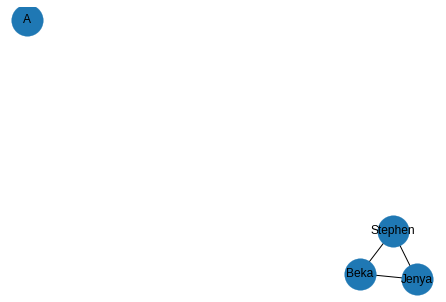

In [11]:
g.add_edges_from([['Stephen', 'Jenya'], ['Stephen', 'Beka'], ['Beka', 'Jenya']])
g.add_edges_from([['Stephen', 'Jenya'], ['Stephen', 'Jenya']])
g.add_nodes_from(['A'])
#, 'Jenya'], ['Stephen', 'Beka'], ['Beka', 'Jenya']])
draw_network(g)

In [12]:
df_journal.nunique()

Unnamed: 0      1563714
page_title       486737
journal_name     182226
dtype: int64

In [13]:
df_sample_journal_data = pd.DataFrame(np.array([['p1', 'j1'],['p1', 'j2'], ['p1', 'j3'], ['p2', 'j1'], ['p2', 'j2']]),
                   columns=['page_title', 'journal_name'])
df_sample_journal_data

,page_title,journal_name
0,p1,j1
1,p1,j2
2,p1,j3
3,p2,j1
4,p2,j2


In [14]:
# df_groupby = df_sample_journal_data.groupby('page_title')['journal_name'].apply(lambda x: ', '.join(x))
df_groupby = df_sample_journal_data.groupby('page_title')['journal_name'].apply(list)

df_groupby

page_title
p1    [j1, j2, j3]
p2        [j1, j2]
Name: journal_name, dtype: object

In [15]:
iterations_sample = itertools.combinations(df_groupby['p1'], 2)
print(iterations_sample)
for i in iterations_sample:
    print(i)

('j1', 'j2')
('j1', 'j3')
('j2', 'j3')


In [16]:
df_groupby = df_journal.groupby('page_title')['journal_name'].apply(list)
df_groupby

page_title
 Amelasorbus                          [Journal of the Arnold Arboretum]
 Astrolista                                                  [Bradleya]
 Ayumi Hamasaki EP                                             [Oricon]
 Chitalpa                                                 [HortScience]
 Crataemespilus              [Botanical Journal of the Linnean Society]
                                            ...                        
Ḫattušili III                                       [Anatolian Studies]
Ṅa Indic              [The Journal of the Royal Asiatic Society of G...
Ṭa Indic              [The Journal of the Royal Asiatic Society of G...
Ẓāʾ                                                          [Language]
Ọbatala                                             [Material Religion]
Name: journal_name, Length: 486737, dtype: object

In [17]:
# find combination of all the journal name

iterations = itertools.combinations(df_groupby[2], 2)

for combi in iterations: 
    print(combi)

In [18]:
# make list iterations based on the combinations

journal_relation_list = []

for page in range(len(df_groupby)):
    iterations = itertools.combinations(df_groupby[page], 2)
    for iter in iterations:
        journal_relation_list.append(iter)

#journal_relation_list


In [19]:
df1 = pd.DataFrame (journal_relation_list, columns = ['journal1', 'journal2'])

df1

,journal1,journal2
0,Telluride News Letter,American Speech
1,HortScience,Bulletin of the Central Botanical Garden AN SSSR
2,Tetsudu014d Daiya Ju014dhu014d Magazine,Japan Railfan Magazine
3,The One,The Games Machine UK
4,The One,ACE Advanced Computer Entertainment
...,...,...
8894650,BioTechniques,BMC Genomics
8894651,BioTechniques,Arch Virol
8894652,BMC Res Notes,BMC Genomics
8894653,BMC Res Notes,Arch Virol


In [20]:
df1['journal1'] = df1['journal1'].astype(str)
df1['journal2'] = df1['journal2'].astype(str)
df1

,journal1,journal2
0,Telluride News Letter,American Speech
1,HortScience,Bulletin of the Central Botanical Garden AN SSSR
2,Tetsudu014d Daiya Ju014dhu014d Magazine,Japan Railfan Magazine
3,The One,The Games Machine UK
4,The One,ACE Advanced Computer Entertainment
...,...,...
8894650,BioTechniques,BMC Genomics
8894651,BioTechniques,Arch Virol
8894652,BMC Res Notes,BMC Genomics
8894653,BMC Res Notes,Arch Virol


In [21]:
df2 = df1[['journal1','journal2']] = pd.DataFrame(np.sort(df1[['journal1','journal2']].values), 
                                 index=df1.index, columns=['journal1','journal2'])
df2

,journal1,journal2
0,American Speech,Telluride News Letter
1,Bulletin of the Central Botanical Garden AN SSSR,HortScience
2,Japan Railfan Magazine,Tetsudu014d Daiya Ju014dhu014d Magazine
3,The Games Machine UK,The One
4,ACE Advanced Computer Entertainment,The One
...,...,...
8894650,BMC Genomics,BioTechniques
8894651,Arch Virol,BioTechniques
8894652,BMC Genomics,BMC Res Notes
8894653,Arch Virol,BMC Res Notes


In [22]:
df3 = df2[['journal1', 'journal2']].value_counts().reset_index(name='weight')
df3.head(20)

,journal1,journal2,weight
0,Nature,PNAS,7449
1,Nature,Science,6180
2,Journal of Biological Chemistry,PNAS,6146
3,PNAS,Science,4928
4,Journal of Biological Chemistry,Nature,4157
5,Genome Res,PNAS,3909
6,Cell,PNAS,3303
7,Cell,Nature,3230
8,LPSN,wwwuniprotorg,2781
9,Cell,Journal of Biological Chemistry,2702


In [23]:
df3 = df3[df3.weight>=200]
df3

,journal1,journal2,weight
0,Nature,PNAS,7449
1,Nature,Science,6180
2,Journal of Biological Chemistry,PNAS,6146
3,PNAS,Science,4928
4,Journal of Biological Chemistry,Nature,4157
...,...,...,...
874,Astronomy Astrophysics,Astrophysical Journal,201
875,Human Mutation,PNAS,200
876,Journal of Personality and Social Psychology,Psychological Review,200
877,American Journal of Physical Anthropology,PLoS ONE,200


In [24]:
df3.nunique()

journal1    188
journal2    144
weight      408
dtype: int64

In [47]:
df3.to_csv(r'df3_weights.csv', index = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a4eab81d0>]],
      dtype=object)

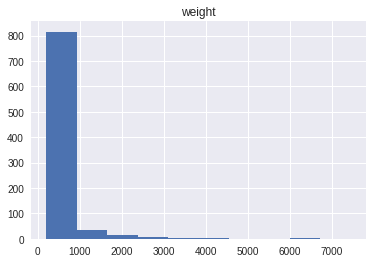

In [26]:
df3.hist(column='weight')

In [38]:
def minimal_pathfinder(G, r = float("inf")):
    """ 
    Args:
    -----
    G [networkX graph]:
        Graph to filter links from.
    r [float]:
        "r" parameter as in the paper.

    Returns:
    -----
    PFNET [networkX graph]:
        Graph containing only the PFNET links.
    """
    
    import networkx as nx
    from collections import defaultdict
    
    H = G.copy()
    
    # Initialize adjacency matrix W
    W = defaultdict(lambda: defaultdict(lambda: float("inf")))
    
    # Set diagonal to 0
    for u in H.nodes():
        W[u][u] = 0 
    
    # Get weights and set W values
    for i, j, d in H.edges(data=True):
        W[i][j] = d['weight'] # Add weights to W
        
    # Get shortest path distance matrix D
    dist = nx.floyd_warshall_predecessor_and_distance(H, weight='weight')[1]
    
    # Iterate over all triples to get values for D
    for k in H.nodes():
        for i in H.nodes():
            for j in H.nodes():
                if r == float("inf"): # adapted from the R-comato version which does a similar check
                # Discard non-shortest paths
                    dist[i][j] = min(dist[i][j], (dist[i][k] + dist[k][j]))
                else:
                    dist[i][j] = min(dist[i][j], (((dist[i][k]) ** r) + ((dist[k][j]) ** r )) ** (1/r))
                
    # Check for type; set placeholder for either case
    if not H.is_directed():
        PFNET = nx.Graph()
        PFNET.add_nodes_from(H.nodes(data=True))
    else:
        PFNET = nx.DiGraph()
        PFNET.add_nodes_from(H.nodes(data=True))
        
    # Add links D_ij only if == W_ij
    for i in H.nodes():
        for j in H.nodes():
            if dist[i][j] == W[i][j]: # If shortest path distance equals distance in adjacency
                if dist[i][j] == float("inf"): # Skip infinite path lengths
                    pass
                elif i == j: # Skip the diagonal
                    pass
                else: # Add link to PFNET
                    weight = dist[i][j]
                    PFNET.add_edge(i, j, weight=weight)
                    
    return PFNET

In [39]:
df4=df3.head(10)
G = nx.from_pandas_edgelist(df4, 'journal1', 'journal2', 'weight')

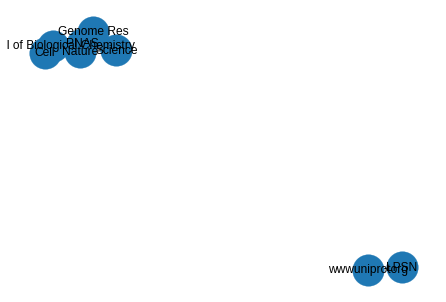

In [40]:
draw_network(G)

In [41]:
PFNET = minimal_pathfinder(G)
print(nx.info(g))
print(nx.info(PFNET))

Graph with 8 nodes and 10 edges
Graph with 8 nodes and 8 edges


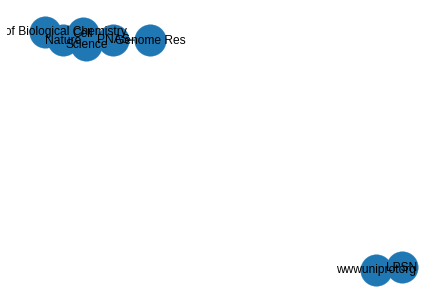

In [42]:
draw_network(PFNET)

In [34]:
# nx.write_gexf(PFNET, "PFNET.gexf")

In [35]:
# nx.write_edgeList(PFNET, 'PFNET.csv', delimeter = ',', data = ['weight'])

AttributeError: ignored

In [ ]:
G = nx.complete_graph(50) # Generate a complete graph

# Add random weights
for (u,v,w) in G.edges(data=True):
    w['Weight'] = np.random.randint(1,20)
    
PFNET = minimal_pathfinder(G)

print(nx.info(G))
print(nx.info(PFNET))

In [ ]:
# for (u,v,w) in G.edges(data=True):
#     print (w)

# CSV for Gephi

In [60]:
df_num_citations

,journal_name,num_citation
0,Nature,21115
1,PNAS,18405
2,Science,15742
3,Journal of Biological Chemistry,12229
4,The IUCN Red List of Threatened Species,10038
...,...,...
182221,Iris u8679u819c,1
182222,Iris Oifigixfail Irish State gazette,1
182223,Iris Na Mara,1
182224,Iris Na Gaeilge,1


In [53]:
unique_journal_list = np.unique(df3[['journal1', 'journal2']].values)
unique_journal_list
print(len(unique_journal_list))

230


In [59]:
df_unique_journal = pd.DataFrame(unique_journal_list, columns = ['journal_name'])
df_unique_journal

,journal_name
0,Acta Ophthalmologica
1,Acta Palaeontologica Polonica
2,Am J Hum Genet
3,American Family Physician
4,American Journal of Human Genetics
...,...
225,Zootaxa
226,eLife
227,wwwdsmzde
228,wwwstraininfonet


In [63]:
# create dataframe with unique journal list
# import pandas
import pandas as pd
   
# read csv data
   
df_node_size = pd.merge(df_unique_journal, 
                     df_num_citations, 
                     on ='journal_name', 
                     how ='left')
df_node_size

,journal_name,num_citation
0,Acta Ophthalmologica,396
1,Acta Palaeontologica Polonica,885
2,Am J Hum Genet,1049
3,American Family Physician,613
4,American Journal of Human Genetics,1227
...,...,...
225,Zootaxa,6869
226,eLife,556
227,wwwdsmzde,1426
228,wwwstraininfonet,863


# New section

# New section

In [64]:
# df_node_size.to_csv("node_size.csv", index=False)